In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# df = pd.read_csv('laptop_price1.csv')
# df.head()

In [197]:
# df.isnull().sum()

In [198]:
# df.drop(['Unnamed: 0','ppi'],axis=1,inplace=True)
# df.columns

In [199]:
# df.to_csv('laptop_price_data.csv')

In [200]:
df = pd.read_csv('laptop_price_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [201]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [202]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [152]:
df.duplicated().sum()

30

In [153]:
df.drop_duplicates(inplace=True)

In [154]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


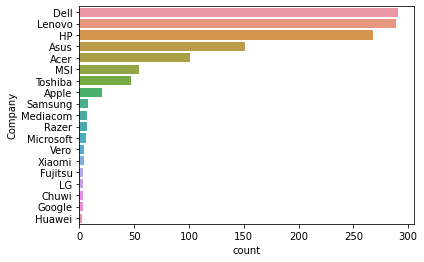

In [155]:
sns.countplot(y=df['Company'],order=df['Company'].value_counts().sort_values(ascending=False).index)
# df['Company'].value_counts().plot(kind='bar')
plt.show()

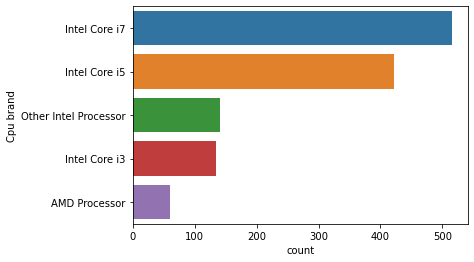

In [156]:
sns.countplot(y=df['Cpu brand'],
              order=df['Cpu brand'].value_counts().sort_values(ascending=False).index)
plt.show()

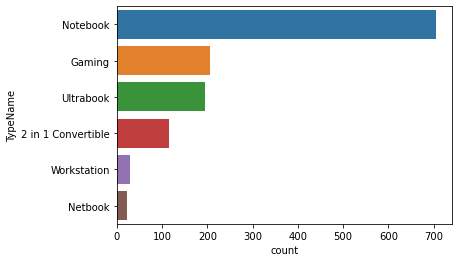

In [157]:
sns.countplot(y=df['TypeName'],
              order=df['TypeName'].value_counts().sort_values(ascending=False).index)
plt.show()

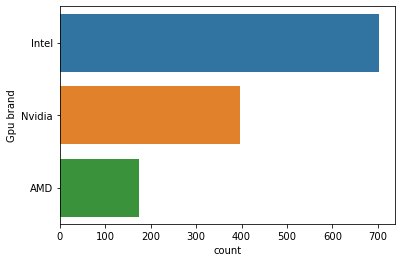

In [158]:
sns.countplot(y=df['Gpu brand'],
              order=df['Gpu brand'].value_counts().sort_values(ascending=False).index)
plt.show()

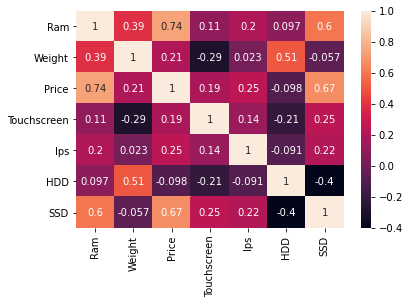

In [159]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [160]:
x = df.drop(columns=['Price'])
y = df['Price']

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(954, 11)
(318, 11)
(954,)
(318,)


In [162]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [164]:
x_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
141,Lenovo,Notebook,8,1.75,0,1,Intel Core i5,0,256,AMD,Windows
1093,Dell,Ultrabook,4,1.40,0,1,Intel Core i5,0,256,AMD,Windows
471,HP,Notebook,8,1.90,0,0,Intel Core i5,500,0,AMD,Windows
1033,HP,Notebook,8,1.95,0,0,Intel Core i5,0,256,Intel,Windows
139,HP,Notebook,4,1.32,0,1,Intel Core i5,0,256,Intel,Windows


In [165]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

#### LinReg

In [166]:
step1 = ColumnTransformer(transformers=[
    ('col_transfrom',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])
],remainder='passthrough')

step2 = LinearRegression()

pipe_LR = Pipeline([
    ('step1',step1),
    ('step2',step2)])

pipe_LR.fit(x_train,y_train)

ypred_lr = pipe_LR.predict(x_test)

eval_model(y_test,ypred_lr)

MAE 13824.043397277523
MSE 405617725.1777346
RMSE 20139.953455202787
R2_Score 0.7049093269060511


#### Ridge Reg

In [167]:
step1 = ColumnTransformer(transformers=
        [('col_transform',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
        remainder='passthrough')
step2 = Ridge(alpha=10)
pipe_ridge = Pipeline([('s1',step1),('s2',step2)])

pipe_ridge.fit(x_train,y_train)
ypred_ridge = pipe_ridge.predict(x_test)

eval_model(y_test,ypred_ridge)

MAE 13548.593071802103
MSE 388071266.64007664
RMSE 19699.524528274196
R2_Score 0.7176745389243961


#### Lasso Regression

In [168]:
step1 = ColumnTransformer(transformers=
        [('col_transform',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
        remainder='passthrough')
step2 = Lasso(alpha=10)
pipe_lasso = Pipeline([('s1',step1),('s2',step2)])

pipe_lasso.fit(x_train,y_train)
ypred_lasso = pipe_lasso.predict(x_test)

eval_model(y_test,ypred_lasso)

MAE 13644.962754119995
MSE 396927869.8775508
RMSE 19923.048709410687
R2_Score 0.7112312775764678


#### KNN Reg

In [175]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
    ],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe_KNN = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_KNN.fit(x_train,y_train)

ypred_knn = pipe_KNN.predict(x_test)

eval_model(y_test,ypred_knn)

MAE 12732.522656603773
MSE 392902617.05499643
RMSE 19821.77128954414
R2_Score 0.7141596864971096


#### DT 

In [176]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=11)

pipe_dt = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_dt.fit(x_train,y_train)
ypred_dt = pipe_dt.predict(x_test)


eval_model(y_test,ypred_dt)

MAE 12611.1258032255
MSE 340739260.3906527
RMSE 18459.124041802545
R2_Score 0.7521090143332538


#### RF Reg

In [190]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_depth=10)

pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rf.fit(x_train,y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test,ypred_rf)

MAE 10839.495121374994
MSE 271339164.14997
RMSE 16472.375789483736
R2_Score 0.8025982307585819


In [191]:
import pickle

In [194]:
pickle.dump(pipe_rf,open('rf1.pkl','wb'))
pickle.dump(df,open('data.pkl','wb'))

In [195]:
df.sample(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
554,HP,Notebook,8,2.63,68198.40,0,0,Intel Core i7,1000,0,Nvidia,Windows
645,Lenovo,Notebook,4,1.43,14598.72,0,0,Other Intel Processor,0,0,Intel,Windows
853,Lenovo,Ultrabook,8,1.96,101391.84,0,1,Intel Core i7,0,256,Nvidia,Windows
933,Lenovo,2 in 1 Convertible,16,1.30,95850.72,1,1,Intel Core i7,0,1000,Intel,Windows
1271,Lenovo,Notebook,2,1.50,12201.12,0,0,Other Intel Processor,0,0,Intel,Windows
984,Toshiba,Notebook,4,1.75,48751.20,0,0,Intel Core i5,500,0,Intel,Windows
1174,Lenovo,Notebook,8,2.20,37775.52,0,0,Intel Core i7,1000,0,Nvidia,Others/No OS/Linux
455,Dell,2 in 1 Convertible,4,1.47,25521.12,1,0,Other Intel Processor,500,0,Intel,Windows
1193,Dell,2 in 1 Convertible,8,1.60,63882.72,1,1,Intel Core i5,0,256,Intel,Windows
858,Dell,Notebook,8,1.62,34578.72,1,0,Intel Core i5,1000,0,Intel,Windows


In [145]:
x_train.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [ ]:
# company,type,ram,weight,touchscreen,ips,cpu,hdd,ssd,gpu,os